In [1]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df
df.info()
pd.to_datetime(df['Month'])
# időalapú index
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month', drop=True)

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [38]:
df.loc["1950":"1951", "Passengers"] + 1

Month
1950-01-01    116
1950-02-01    127
1950-03-01    142
1950-04-01    136
1950-05-01    126
1950-06-01    150
1950-07-01    171
1950-08-01    171
1950-09-01    159
1950-10-01    134
1950-11-01    115
1950-12-01    141
1951-01-01    146
1951-02-01    151
1951-03-01    179
1951-04-01    164
1951-05-01    173
1951-06-01    179
1951-07-01    200
1951-08-01    200
1951-09-01    185
1951-10-01    163
1951-11-01    147
1951-12-01    167
Name: Passengers, dtype: int64

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [41]:
idx = df.sample(10, random_state=42).index
df.loc[idx] = None

In [51]:
df[df["Passengers"].isna()]

,Passengers
Month,
1950-01-01,NaN
1950-07-01,NaN
1950-08-01,NaN
1953-09-01,NaN
1954-06-01,NaN
1954-07-01,NaN
1955-11-01,NaN
1957-02-01,NaN
1958-10-01,NaN


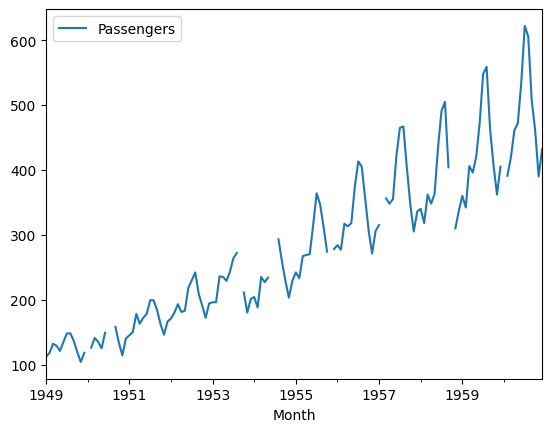

In [53]:
df.plot();

# Missingek kezelése

<Axes: xlabel='Month'>

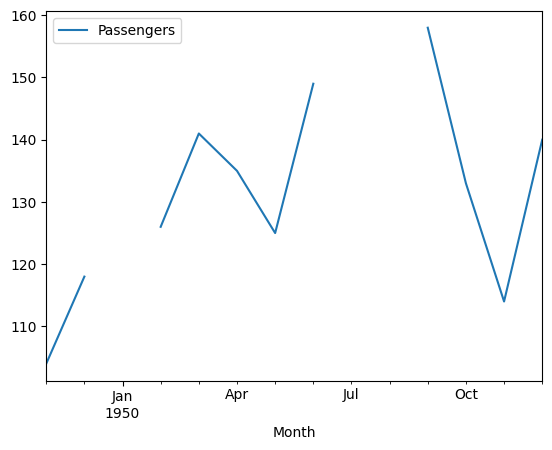

In [54]:
df["1949-11":"1950-12"].plot()

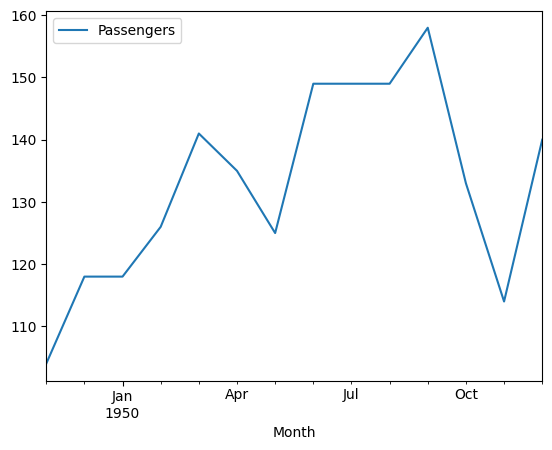

In [55]:
df["1949-11":"1950-12"].ffill().plot();

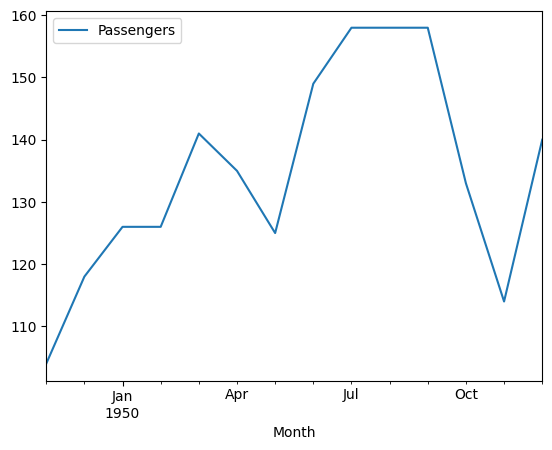

In [56]:
df["1949-11":"1950-12"].bfill().plot();

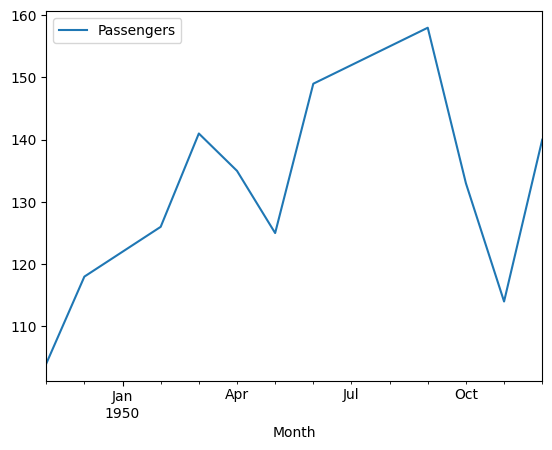

In [278]:
df["1949-11":"1950-12"].interpolate("linear").plot();

In [57]:
df["linear_interpol"] = df["Passengers"].interpolate(method="linear")
df["1949-11":"1950-12"]

,Passengers,linear_interpol
Month,,
1949-11-01,104.0,104.0
1949-12-01,118.0,118.0
1950-01-01,NaN,122.0
1950-02-01,126.0,126.0
1950-03-01,141.0,141.0
1950-04-01,135.0,135.0
1950-05-01,125.0,125.0
1950-06-01,149.0,149.0
1950-07-01,NaN,152.0


In [280]:
df.loc["1950-02-01", "Passengers"] = None

In [60]:
df["linear_interpol"] = df["Passengers"].interpolate(method="linear")
df["time_interpol"] = df["Passengers"].interpolate(method="time")
df["1949-11":"1950-12"]


,Passengers,linear_interpol,time_interpol
Month,,,
1949-11-01,104.0,104.0,104.000000
1949-12-01,118.0,118.0,118.000000
1950-01-01,NaN,122.0,122.000000
1950-02-01,126.0,126.0,126.000000
1950-03-01,141.0,141.0,141.000000
1950-04-01,135.0,135.0,135.000000
1950-05-01,125.0,125.0,125.000000
1950-06-01,149.0,149.0,149.000000
1950-07-01,NaN,152.0,151.934783


In [62]:
import numpy as np

,values,time_interpolated,linear_interpolated,spline_interpolated
2023-01-01,10.0,10.0,10.0,10.0
2023-01-02,NaN,17.5,20.0,16.0
2023-01-04,NaN,32.5,30.0,31.0
2023-01-05,40.0,40.0,40.0,40.0
2023-01-06,50.0,50.0,50.0,50.0
2023-01-07,NaN,50.0,50.0,61.0


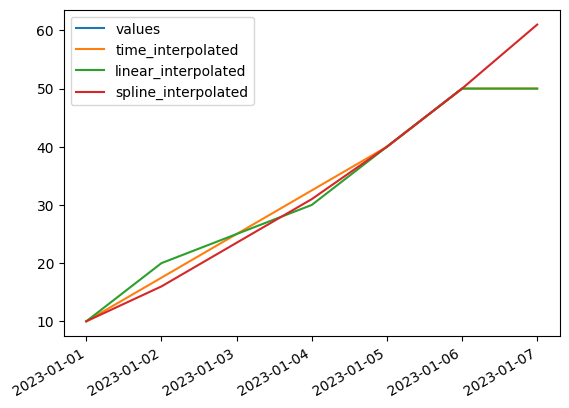

In [63]:
# Interpolációk
date_range = pd.date_range(start='2023-01-01', periods=7, freq='D')
date_range = date_range.drop('2023-01-03')
data = {'values': [10, np.nan, np.nan, 40, 50, np.nan]}
dff = pd.DataFrame(data, index=date_range)


dff['time_interpolated'] = dff['values'].interpolate(method='time')
dff['linear_interpolated'] = dff['values'].interpolate(method='linear')
dff['spline_interpolated'] = dff['values'].interpolate(method='spline', order=2)

dff.plot()
dff

In [71]:
# Új minta létrehozása havi gyakorisággal és az értékek átlagolásával
df_annual = df.resample('Y').mean()
df_annual

,Passengers,linear_interpol,time_interpol
Month,,,
1949-12-31,126.666667,126.666667,126.666667
1950-12-31,135.666667,137.500000,137.491848
1951-12-31,170.166667,170.166667,170.166667
1952-12-31,197.000000,197.000000,197.000000
1953-12-31,223.909091,225.375000,225.333333
1954-12-31,230.100000,235.666667,235.666667
1955-12-31,288.272727,287.250000,287.252732
1956-12-31,328.250000,328.250000,328.250000
1957-12-31,374.545455,371.291667,371.378531


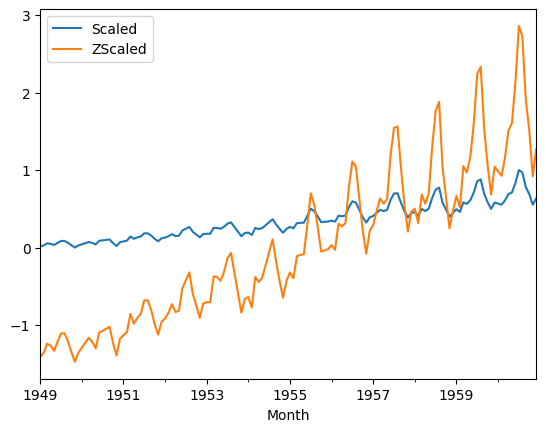

In [313]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = MinMaxScaler(feature_range=(0, 1))
zscaler = StandardScaler()
df['Scaled'] = scaler.fit_transform(df[['time_interpol']])
df['ZScaled'] = zscaler.fit_transform(df[['time_interpol']])

df.head()
df[["Scaled", "ZScaled"]].plot();

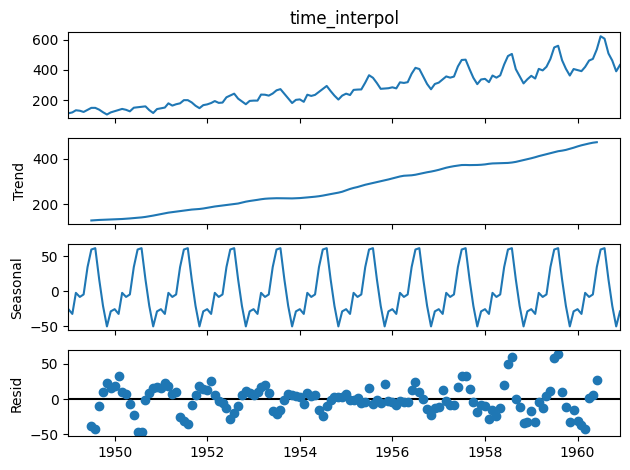

In [318]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df["time_interpol"])
decomp.plot();

In [74]:
import yfinance as yf

In [79]:
sdf = yf.download("MSFT", start="2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# 2023-2024
# havi átlagok

In [86]:
sdf[["Adj Close", "Close"]]

Price,Adj Close,Close
Ticker,MSFT,MSFT
Date,,
2020-01-02 00:00:00+00:00,153.938187,160.619995
2020-01-03 00:00:00+00:00,152.021423,158.619995
2020-01-06 00:00:00+00:00,152.414307,159.029999
2020-01-07 00:00:00+00:00,151.024689,157.580002
2020-01-08 00:00:00+00:00,153.430222,160.089996
...,...,...
2024-11-06 00:00:00+00:00,420.179993,420.179993
2024-11-07 00:00:00+00:00,425.429993,425.429993


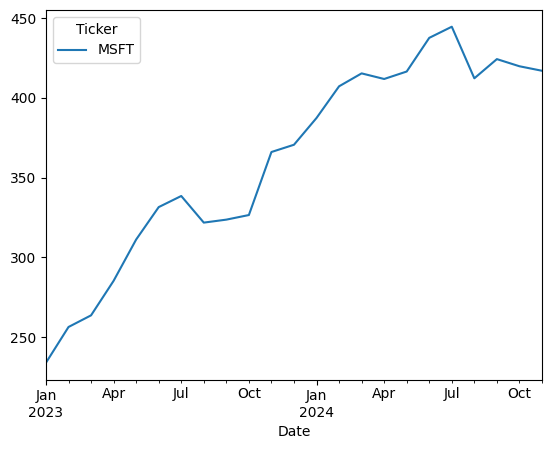

In [114]:
sdf.loc["2023":"2024", "Adj Close"].\
    resample("M").\
        mean().\
            plot();


In [103]:
sdf["Adj Close"]

Ticker,MSFT
Date,
2020-01-02 00:00:00+00:00,153.938187
2020-01-03 00:00:00+00:00,152.021423
2020-01-06 00:00:00+00:00,152.414307
2020-01-07 00:00:00+00:00,151.024689
2020-01-08 00:00:00+00:00,153.430222
...,...
2024-11-06 00:00:00+00:00,420.179993
2024-11-07 00:00:00+00:00,425.429993
2024-11-08 00:00:00+00:00,422.540009


In [118]:
df

,Passengers,linear_interpol,time_interpol
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0
...,...,...,...
1960-08-01,606.0,606.0,606.0
1960-09-01,508.0,508.0,508.0
1960-10-01,461.0,461.0,461.0


<Axes: xlabel='Month'>

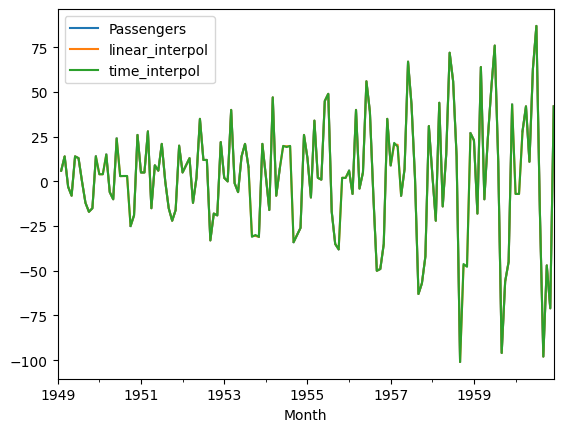

In [123]:
df.diff().plot()

<Axes: xlabel='Month'>

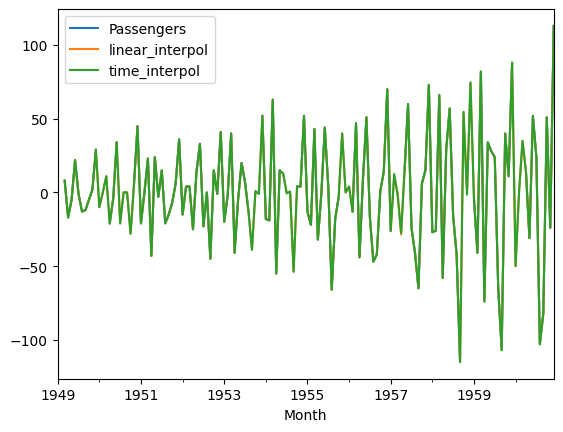

In [122]:
df.diff().diff().plot()

<Axes: xlabel='Date'>

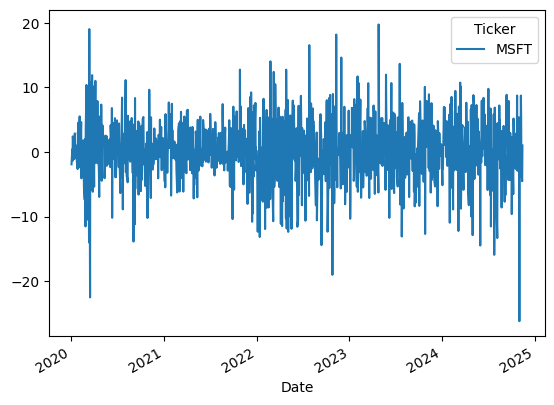

In [102]:
sdf["Adj Close"].diff().plot()

In [ ]:
# HF: lokális átlaggal történő imputációt végző függvény létrehozása

# A: előző k adat vagy következő k adat alapján átlag
# B: mindkét irányban